In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset to import

(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
# Check the value in data
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

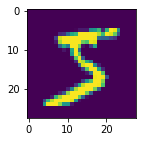

In [7]:
# Check image
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])

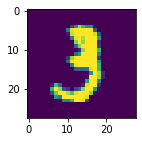

In [8]:
# Check image
plt.figure(figsize=(15,2))
plt.imshow(x_train[10])

In [9]:
y_train[10]

3

In [10]:
#Scale / Normalize data
x_train = x_train/ 255
x_test = x_test/ 255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [57]:
#Convert data as 3 dimensional data so that we can build model
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [58]:
#Convert data as 3 dimentional data so that we can build model
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [64]:
# Build an ANN model for comparison
ann = models.Sequential([layers.Flatten(input_shape=(28,28,1)),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation='sigmoid')
                        ])

In [65]:
#compile model - pass three parameters: loss, optimizer, metrics
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
# Summary of architecture
ann.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Fit the model
ann.fit(x_train,y_train, epochs= 3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3181 - accuracy: 0.9020
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0775 - accuracy: 0.9760
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0477 - accuracy: 0.9854


In [69]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9766


[0.0792328342795372, 0.9765999913215637]

#### Analysis for ANN modeling

1. Train learning accuracy is 98%
2. Test learning accuracy is 97%

Shows model is slightly overfitted for ANN and but loss is very low.

In [59]:
# Build CNN Model
cnn = models.Sequential([
    layers.Conv2D(filters= 10, kernel_size=(2,2), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
#layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
#layers.MaxPool2D((2,2)),
    # Dense
    layers.Flatten(),
#layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [60]:
# Compile the model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics= ['accuracy'])

In [61]:
# Summary
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 10)        50        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                16910     
Total params: 16,960
Trainable params: 16,960
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Fit the model
cnn.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5987 - accuracy: 0.8392
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1746 - accuracy: 0.9494
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1243 - accuracy: 0.9644
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0970 - accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0858 - accuracy: 0.9755


In [63]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0880 - accuracy: 0.9734


[0.08800071477890015, 0.9733999967575073]

#### Analysis for CNN modeling

1. Train learning accuracy is 97%
2. Test learning accuracy is 97%

Shows model is perfectly fitted for CNN and the loss shown is low.

In [70]:
# Compare result
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [71]:
# Convert to one dimension
y_test = y_test.reshape(-1,)

In [72]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [73]:
y_pred = cnn.predict(x_test)

In [74]:
y_pred[:5]

array([[4.65109944e-03, 2.82947149e-05, 1.22027695e-02, 4.17387843e-01,
        4.96349094e-05, 1.87996030e-03, 3.80001893e-07, 9.99880910e-01,
        8.42460990e-03, 3.63481581e-01],
       [1.11584365e-02, 1.29025578e-02, 9.95292902e-01, 2.41025388e-02,
        5.45773879e-08, 5.88124990e-03, 4.28192019e-02, 1.28668803e-11,
        6.08277321e-03, 8.19131714e-08],
       [7.50693679e-03, 9.98032510e-01, 2.52506673e-01, 4.75665927e-03,
        2.84153610e-01, 1.03666484e-02, 2.75816321e-02, 2.32220560e-01,
        5.06078303e-02, 1.36965513e-03],
       [9.97969866e-01, 3.39564758e-05, 3.00919116e-02, 7.84277363e-05,
        7.52533670e-05, 1.75768137e-03, 2.38260031e-02, 5.45090437e-03,
        4.04685736e-04, 2.62331963e-03],
       [3.18494439e-03, 3.80411744e-03, 3.66190076e-03, 3.85096669e-03,
        9.98212516e-01, 9.94180373e-05, 8.82849097e-03, 3.73539329e-03,
        4.20954823e-03, 9.97678041e-02]], dtype=float32)

In [75]:
# Probability of the high values between 0 to 1 result
np.argmax(x_test[0])

355

In [76]:
# Run all list of result and the highest values of all
y_classes = [np.argmax(elements) for elements in y_pred]

In [77]:
y_classes[:5]

[7, 2, 1, 0, 4]

In [78]:
# Actual data lable
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Model is able to perfectly predict values

In [79]:
# Check confusion matrix
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_classes)

In [80]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    3,    0,    0,    0,    2,    2,    2,    0],
       [   0, 1125,    1,    3,    0,    1,    1,    1,    3,    0],
       [   4,    2,  995,    5,    4,    0,    3,    9,    9,    1],
       [   0,    0,    4,  993,    0,    4,    0,    3,    6,    0],
       [   1,    0,    1,    0,  968,    0,    1,    1,    2,    8],
       [   3,    0,    2,   12,    0,  858,    7,    1,    8,    1],
       [  10,    3,    1,    0,    4,    2,  935,    0,    3,    0],
       [   1,    3,   17,    9,    3,    0,    0,  986,    5,    4],
       [   5,    0,    4,    9,    1,    1,    0,    2,  948,    4],
       [   8,    3,    1,   10,    8,    2,    1,   13,    8,  955]])>

### Analysis shows that:

1. Model predicts each value properly
2. Minimal confusion in prediction of 0 - Possibliy to predict 6 when actually 0 is 10 times out of ~1000.
3. Minimal confusion in prediction of 2 - Possibliy to predict 7 when actually 2 is 17 times out of ~1020.
4. Minimal confusion in prediction of few others as well.

Final analysis shows that the CNN model is able to predict actuals 99% of the time.

# Performing Classification

In [81]:
from sklearn.metrics import classification_report

In [82]:
print("Classification Report = \n", classification_report(y_test,y_classes))

Classification Report = 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.97      0.96       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



##### Analysis
1. Accuracy of ANN for train and test - 98% and 97%
2. Accuracy of CNN for train and test - Both 97%
3. Precision of CNN - Prediction for each number is between 95 to 99 Percent
5. Recall of CNN - Between 95 to 99 Percent

This shows that the CNN model can predict accurately to 99% that the number is what is in the picture hence the data set is good for analysis.